In [0]:
# Asteroid Classification 

In [0]:
from google.colab import files

files.upload()

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os

for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        if(filename=="nasa.csv"):
            print(os.path.join(dirname, filename))

In [0]:
import zipfile
with zipfile.ZipFile("nasa.csv.zip","r") as zip_ref:
    zip_ref.extractall()

In [0]:
data = pd.read_csv('nasa.csv.zip')

In [0]:
data.columns = [c.replace(' ', '_') for c in data.columns]
data.head()

,Neo_Reference_ID,Name,Absolute_Magnitude,Est_Dia_in_KM(min),Est_Dia_in_KM(max),Est_Dia_in_M(min),Est_Dia_in_M(max),Est_Dia_in_Miles(min),Est_Dia_in_Miles(max),Est_Dia_in_Feet(min),Est_Dia_in_Feet(max),Close_Approach_Date,Epoch_Date_Close_Approach,Relative_Velocity_km_per_sec,Relative_Velocity_km_per_hr,Miles_per_hour,Miss_Dist.(Astronomical),Miss_Dist.(lunar),Miss_Dist.(kilometers),Miss_Dist.(miles),Orbiting_Body,Orbit_ID,Orbit_Determination_Date,Orbit_Uncertainity,Minimum_Orbit_Intersection,Jupiter_Tisserand_Invariant,Epoch_Osculation,Eccentricity,Semi_Major_Axis,Inclination,Asc_Node_Longitude,Orbital_Period,Perihelion_Distance,Perihelion_Arg,Aphelion_Dist,Perihelion_Time,Mean_Anomaly,Mean_Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [0]:
# There are so much unnecesarry data for me so I will delete non usefull columns.

# Then I need to convert my categorial data.
   #   Hazardous 1
   #   Safe 0

In [0]:
data.drop(["Neo_Reference_ID","Name","Close_Approach_Date","Epoch_Date_Close_Approach"
           ,"Orbiting_Body","Orbit_Determination_Date","Equinox"], axis=1, inplace=True)

data.Hazardous = [1 if each==True else 0 for each in data.Hazardous]

In [0]:
data.head()

,Absolute_Magnitude,Est_Dia_in_KM(min),Est_Dia_in_KM(max),Est_Dia_in_M(min),Est_Dia_in_M(max),Est_Dia_in_Miles(min),Est_Dia_in_Miles(max),Est_Dia_in_Feet(min),Est_Dia_in_Feet(max),Relative_Velocity_km_per_sec,Relative_Velocity_km_per_hr,Miles_per_hour,Miss_Dist.(Astronomical),Miss_Dist.(lunar),Miss_Dist.(kilometers),Miss_Dist.(miles),Orbit_ID,Orbit_Uncertainity,Minimum_Orbit_Intersection,Jupiter_Tisserand_Invariant,Epoch_Osculation,Eccentricity,Semi_Major_Axis,Inclination,Asc_Node_Longitude,Orbital_Period,Perihelion_Distance,Perihelion_Arg,Aphelion_Dist,Perihelion_Time,Mean_Anomaly,Mean_Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,17,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,21,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,22,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,7,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,25,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [0]:
# Now i will scale my data in order not to effected so much by outliers.

In [0]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

y = data.Hazardous.values.reshape(-1, 1)
x = data.drop(["Hazardous"], axis=1).values # returns a numpy array

x = scale.fit_transform(x)

In [0]:
# Now i will split my data for visualization purposes.

In [0]:
c = data.groupby('Hazardous')
a = c.get_group(0) # safe
b = c.get_group(1) # hazardous

a1, a2 = a.Mean_Anomaly, a.Minimum_Orbit_Intersection
b1, b2 = b.Mean_Anomaly , b.Minimum_Orbit_Intersection

In [0]:
# It looks like my data is very close for drawing lines to seperate them.
# So, probably a decision tree or random forest classifier will be more efficient
# but I will use Logistic Regression , SVM, Decision tree and compare them.

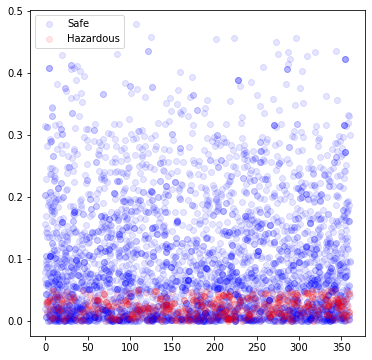

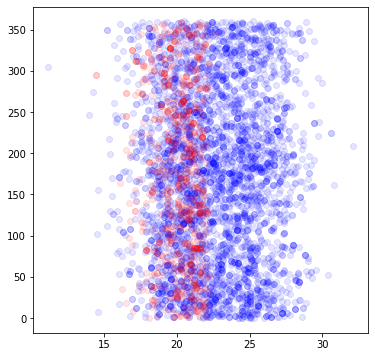

In [0]:
plt.figure(figsize=(6,6))

plt.scatter(a.Mean_Anomaly, a.Minimum_Orbit_Intersection, color="b",
            label="Safe", alpha=0.1)

plt.scatter(b.Mean_Anomaly,b.Minimum_Orbit_Intersection, color='r',
            label="Hazardous", alpha=0.1)

plt.legend()
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(a.Absolute_Magnitude,a.Asc_Node_Longitude,color="b",
            label="Safe",alpha=0.1)

plt.scatter(b.Absolute_Magnitude,b.Asc_Node_Longitude,color="r", 
            label ="Hazardous",alpha=0.1)


In [0]:
# Before training i will split train and test data.

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)

In [0]:
# We are ready for training.Let's start with logistic regression.

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train.ravel()) # returned a flatten array

print("Logistic Regression Acc : ", lr.score(x_test,y_test))

Logistic Regression Acc :  0.9243070362473348


In [0]:
# As you can see logistic regression was good but we can do better.

In [0]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train.ravel())
print("SVM Acc : ",svc.score(x_test,y_test))

SVM Acc :  0.9339019189765458


In [0]:
# I got %99.36 accuracy from decision tree because like I said before this data
# was too complicated for us to draw a seperating curve.
# However , with decision tree , we can identify the important features and classify by them.

In [0]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train.ravel())
print("Decision Tree Acc : ", dtc.score(x_test,y_test))

Decision Tree Acc :  0.9936034115138592


In [0]:
# Now let's visualize our tree and see what happens.

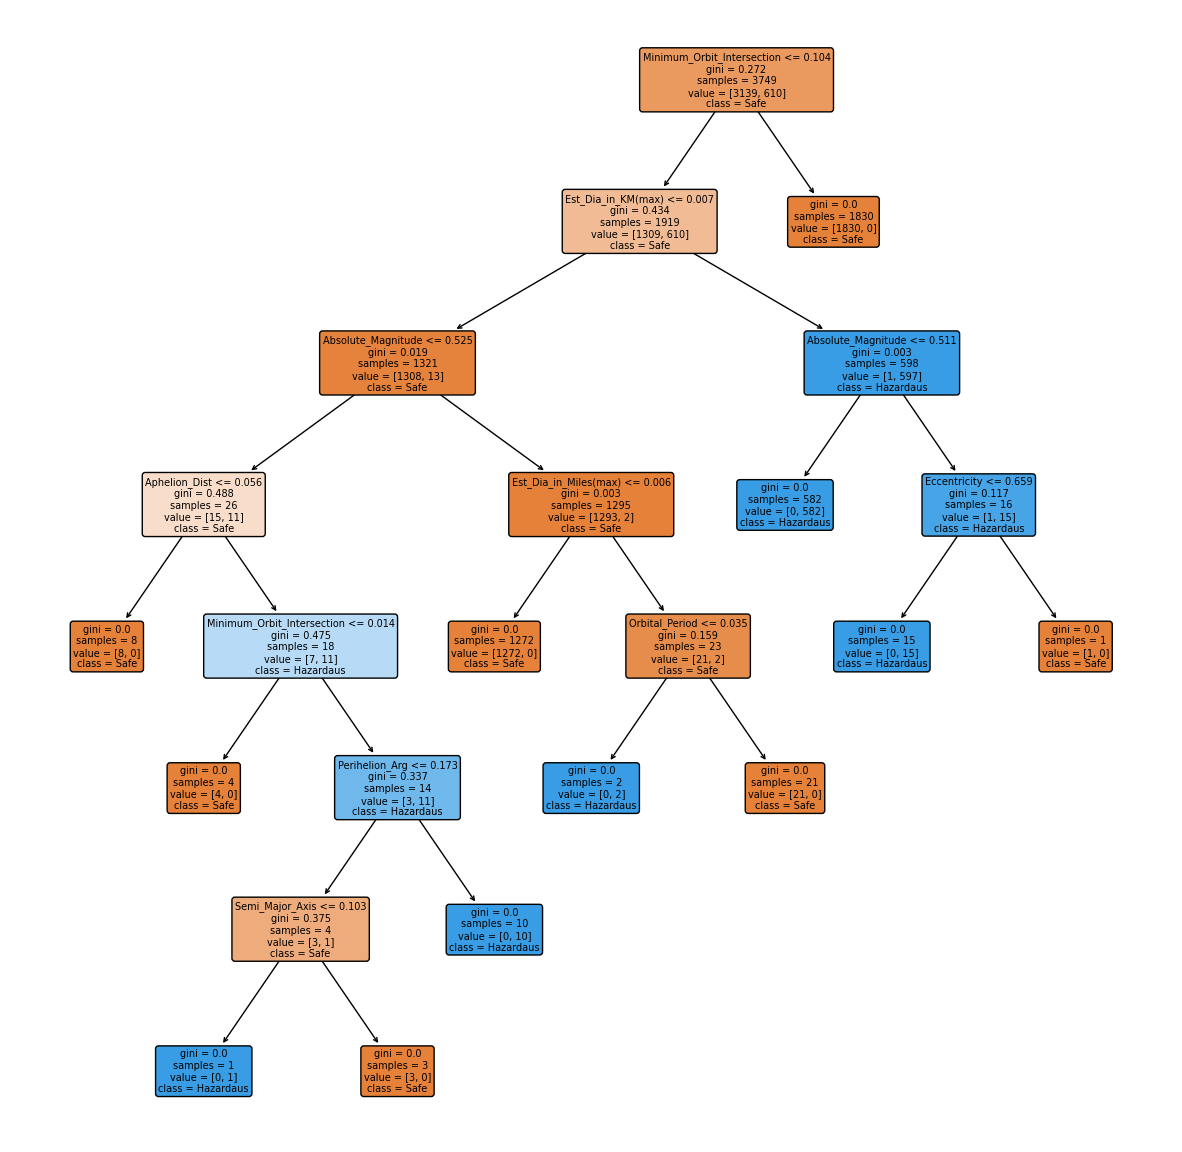

In [0]:
plt.figure(figsize=(15,15), dpi=100)

tree.plot_tree(dtc,
              feature_names = data.columns,
              rounded = True,
              filled = True,
               class_names = ["Safe","Hazardaus"],
              impurity = True)

plt.savefig('tree.png')